In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import date

### Data Used : 3 month website data on views per minute for a blogpost

In [4]:
view = pd.read_csv('DataRepository/timeseries_views_per_min.csv', index_col = 0)

In [8]:
df = view.reset_index()
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()

,datetime,f1
0,1990-03-01 00:00:00,4356.0
1,1990-03-01 00:01:00,1108.0
2,1990-03-01 00:02:00,3753.0
3,1990-03-01 00:03:00,27144.0
4,1990-03-01 00:04:00,1408.0


#### Let's check whether this data follows a normal distribution or not

# Checks for Normality :

    (A) Graphical Tests :
        
        1) Distribution Plot
        2) Histogram
        3) QQ Plot
        
        
    (B) Metrics :
    
        1) Skewness 
        2) Kurtosis
        
        
    (C) Statistical Tests :
        
        1) Shapiro-Wilk Test
        2) Kolmogorov-Smirnov Test
        3) Anderson-Darling Test

# (A) Graphical Tests

##  (A.1) Distribution Plot

<AxesSubplot:xlabel='f1', ylabel='Density'>

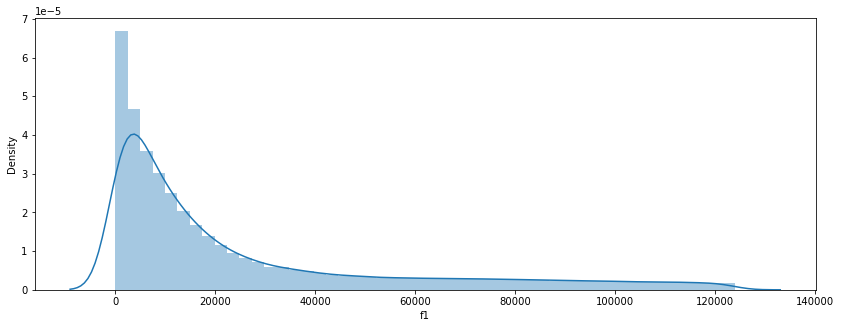

In [377]:
plt.figure(figsize = (14,5))
sns.distplot(df['f1'])

#### As we can clearly see, this data does not follow the normal distribution, the plot has higher density towards the left side. 

#### The data is said to be "Right Skewed"

## (A.2) Histogram

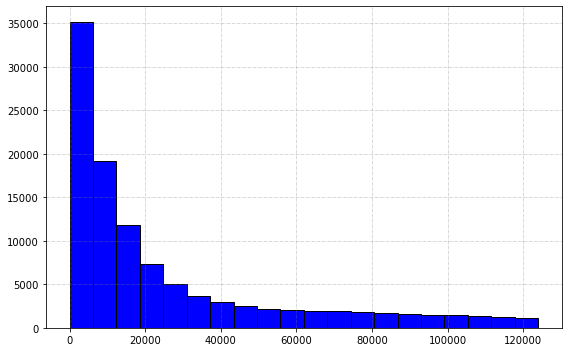

In [389]:
fig, axs = plt.subplots(1, 1,figsize =(8, 5),tight_layout = True)

# Adding x, y gridlines
axs.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
 
axs.hist(df['f1'], bins = 20, color = 'blue', edgecolor='black')

plt.show()

#### As we can clearly see, this data does not follow the normal distribution & has more values in the range of 0 to 30,000

## (A.3) Quantile-Quantile Plot (QQ Plot)

    Q-Q plot is often called quantile plot. It is a 2D plot in which we compare the theoretical quantiles of a distribution with the sample quantiles of a dataset. If the dataset has been generated from that distribution, we expect this chart to be close to a 45-degree line, because the sample quantiles will be similar to the theoretical quantiles. If the sample has been generated from a different distribution, we won’t get a 45 line.
    
    The sample quantiles should be quite similar with the theoretical quantiles, if the blue points are very close or almost coinciding with the red line, which is a 45 degree line. Hence, the data will be normally distributed in this case.

In [383]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, uniform

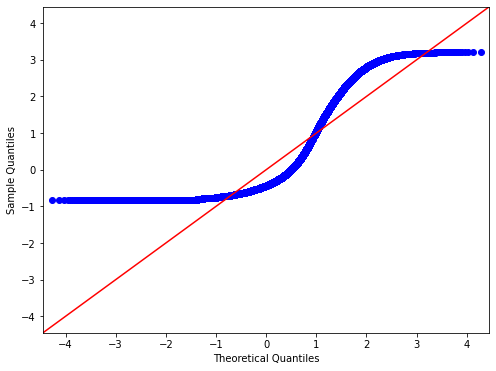

In [384]:
plt.rcParams['figure.figsize'] = [8, 6]

qqplot(df['f1'], norm, fit=True, line="45")

plt.show()

#### In the QQ Plot, we can clearly see that majority of the blue points DO NOT coincide with the 45 degree red line and hence, our data does not follow the normal distribution.

# (B) Metrics

## (B.1) Skewness 

    Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution.  It is an important statistical methodology that is used to estimate the asymmetrical behavior rather than computing frequency distribution. Skewness can be two types:

    1) Symmetrical: A distribution can be called symmetric if it appears the same from the left and right from the center point.
    2) Asymmetrical: A distribution can be called asymmetric if it doesn’t appear the same from the left and right from the center point.

    Distribution on the basis of skewness value:

    Skewness = 0: Then normally distributed.
    Skewness > 0: Then more weight in the left tail of the distribution (called Right Skewed)
    Skewness < 0: Then more weight in the right tail of the distribution (called Left Skewed)


In [385]:
import scipy
from scipy.stats import skew

In [412]:
skew_val = skew(df['f1'], axis=0, bias=True)
skew_val

1.538480887364415

#### Our data is Right Skewed as the skewness comes out to be greater than 0.

## (B.2) Kurtosis

    It is also a statistical term and an important characteristic of frequency distribution. It determines whether a distribution is heavy-tailed in respect of the normal distribution. It provides information about the shape of a frequency distribution.

    
    kurtosis < 3 : Distribution is called Platykurtic (Lower peak than a perfect normal distribution)
    kurtosis = 3 : Distribution is called Mesokurtic (Peak equal to a perfect normal distribution)
    kurtosis > 3 : Distribution is called Leptokurtic (Higher peak than a perfect normal distribution)

In [16]:
from scipy.stats import kurtosis

In [411]:
kurt_val = kurtosis(df['f1'], axis=0, bias=True)
kurt_val

1.3623856844908682

#### Since our Kurtosis value is not 3 or closer to 3, we can conclude that our data does not follow a normal distribution.

## (C) Statistical Tests

### (C.1) Shapiro-Wilk Test

    H0(Null Hypothesis)      : Sample follows the normal distributions (pval > 0.05)
    Ha(Alternate Hypothesis) : Sample do not follow the normal distributions (pval <= 0.05)

In [18]:
from scipy.stats import shapiro

In [19]:
stat, pval = shapiro(df['f1'])

C:\Users\Vineet Pandya\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
stat, pval

(0.7699156999588013, 0.0)

#### Since pval < 0.05, we are 95% confident that the data is not normally distributed.

#### Infact, since pval < 0.01, we are also 99% confident that the data is not normally distributed.

### (C.2) Kolmogorov-Smirnov Test

    H0(Null Hypothesis)      : the numbers are uniformly distributed between 0-1. 
    Ha(Alternate Hypothesis) : the numbers are not uniformly distributed between 0-1.

In [413]:
from scipy.stats import kstest

In [414]:
stat, pval = kstest(df['f1'], "norm")

In [415]:
stat, pval

(0.9459066643064109, 0.0)

##### Since pval < 0.05, we are 95% confident that the data is not normally distributed.

####  Infact, since pval < 0.01, we are also 99% confident that the data is not normally distributed.

### (C.3) Anderson-Darling Test

    - Anderson Darling Test provides 3 outputs : 
    1) a test statistic value
    2) a list of critical values 
    3) a list of significance or alpha values (15%, 10%, 5%, 2.5%, 1%) corresponding to confidence intervals (85%, 90%, 95%, 97.5% and 99%)
    
    
    Interpretation with an example:
    
    Null Hyp (N0) : Data is normally distributed
    Alt Hyp (Na)  : Data is not normally distributed
    
    Ex : If statistic = 0.88
         Critical values list = [0.43, 0.57, 0.72, 0.91, 1.23]
         Alpha values list = [15, 10, 5, 2.5, 1]
        
    Results : Since the statistic value (0.88) > 0.43, we reject null hypothesis with 85% confidence 
              Since the statistic value (0.88) > 0.57, we reject null hypothesis with 90% confidence 
              Since the statistic value (0.88) > 0.72, we reject null hypothesis with 95% confidence 
              Since the statistic value (0.88) < 0.91, we fail to reject the null hypothesis with 97.5% confidence 
              Since the statistic value (0.88) < 1.23, we fail to reject the null hypothesis with 99% confidence 
              
    
    Note : Desirable AD statistic value in this case is 0.42 or less

#### A desirable AD statistic value : the smaller the AD value, the better the fit i.e. we should be able to "fail to reject the null hypothesis even with 85% confidence"

In [395]:
from scipy.stats import anderson

In [407]:
stat, critical_value_list, alpha_value_list = anderson(df['f1'], dist= 'norm')

In [408]:
stat

9196.747290766376

In [409]:
critical_value_list

array([0.576, 0.656, 0.787, 0.918, 1.092])

In [410]:
alpha_value_list

array([15. , 10. ,  5. ,  2.5,  1. ])

#### Since our AD statistic value (9196.75) is very very large compared to even the last critical value (1.092), therefore we are 99% confident to reject the Null hypothesis i.e. our data is not normally distributed.

## Data Transformation (also called Power Transformation or Data Augmentation)

    - Types of transformations we will implement :
    
        1) Log 
        2) Square Root
        3) Cube Root
        4) Inverse
        5) Box-Cox 
        6) Yeo-Johnson

### (1) Log Transformation

In [327]:
df_log = df.copy()

In [328]:
# data does not have any negative values, but have 5806 records that have 0 values

len(df_log[df_log['f1'] == 0]), len(df_log[df_log['f1'] < 0])

(5806, 0)

In [329]:
# Log transformation does not work on negative or 0 values, hence adding a constant value (1) to all the records

df_log['f1'] = df_log['f1'].apply(lambda x: x+1)

In [330]:
# checking for any negative or 0 values

len(df_log[df_log['f1'] == 0]), len(df_log[df_log['f1'] < 0])

(0, 0)

In [331]:
df.head()

,datetime,f1
0,1990-03-01 00:00:00,4356.0
1,1990-03-01 00:01:00,1108.0
2,1990-03-01 00:02:00,3753.0
3,1990-03-01 00:03:00,27144.0
4,1990-03-01 00:04:00,1408.0


In [332]:
df_log.head()

,datetime,f1
0,1990-03-01 00:00:00,4357.0
1,1990-03-01 00:01:00,1109.0
2,1990-03-01 00:02:00,3754.0
3,1990-03-01 00:03:00,27145.0
4,1990-03-01 00:04:00,1409.0


In [333]:
# Log transformation

df_log['f1'] = np.log(df_log['f1'])

In [334]:
df_log.head()

,datetime,f1
0,1990-03-01 00:00:00,8.379539
1,1990-03-01 00:01:00,7.011214
2,1990-03-01 00:02:00,8.230577
3,1990-03-01 00:03:00,10.208948
4,1990-03-01 00:04:00,7.250636


<AxesSubplot:xlabel='f1', ylabel='Density'>

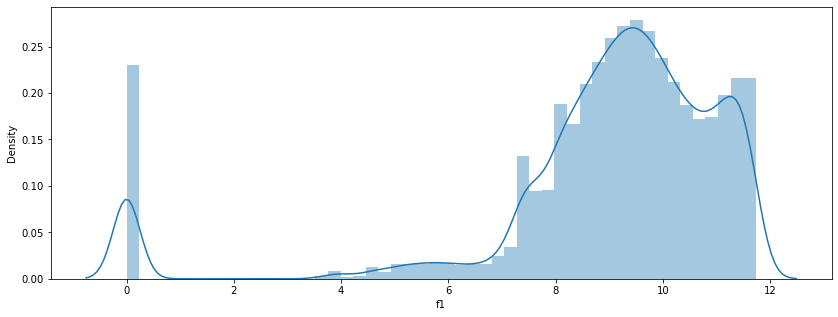

In [87]:
plt.figure(figsize = (14,5))
sns.distplot(df_log['f1'])

In [109]:
def mean_median_diff(df,col):
    
    data_mean = np.mean(df[col])
    data_median = np.median(df[col])
    
    return round(data_mean,2),round(data_median,2),round(data_mean - data_median,2)

In [110]:
f1_mean,f1_median, f1_diff = mean_median_diff(df,'f1')
f1_mean,f1_median, f1_diff

(25463.37, 12121.0, 13342.37)

In [335]:
f1_log_mean,f1_log_median, f1_log_diff = mean_median_diff(df_log,'f1')
f1_log_mean,f1_log_median, f1_log_diff

(8.92, 9.4, -0.49)

#### The mean and median of original data were very far apart. After Log Transformation, the mean and median are almost equal, which is a characteristic of a normally distributed data. 

#### But, this is not a very desirable distribution. Let's try with other transformations

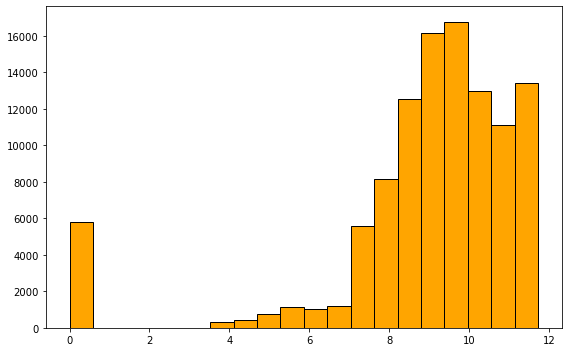

In [394]:
# Histogram

fig, axs = plt.subplots(1, 1,figsize =(8, 5),tight_layout = True)
axs.hist(df_log['f1'], bins = 20, color = 'orange', edgecolor='black')
plt.show()

### Inversing the log transformed data back to original data

In [128]:
df_log["f1_inversed"] = np.exp(df_log['f1'])
df_log['f1_inversed'] = df_log['f1_inversed'].apply(lambda x : x - 1)

In [326]:
df_log.head()

,datetime,f1
0,1990-03-01 00:00:00,4357.0
1,1990-03-01 00:01:00,1109.0
2,1990-03-01 00:02:00,3754.0
3,1990-03-01 00:03:00,27145.0
4,1990-03-01 00:04:00,1409.0


## (2) Square-Root Transformation

In [144]:
df_sqroot = df.copy()

In [145]:
# Square Root transformation does not work on negative values. our data does not have any negative values

len(df_sqroot[df_sqroot['f1'] < 0])

0

In [146]:
# Square root transformation

df_sqroot['f1'] = np.sqrt(df_sqroot['f1'])

In [147]:
df_sqroot.head()

,datetime,f1
0,1990-03-01 00:00:00,66.000000
1,1990-03-01 00:01:00,33.286634
2,1990-03-01 00:02:00,61.261734
3,1990-03-01 00:03:00,164.754363
4,1990-03-01 00:04:00,37.523326


<AxesSubplot:xlabel='f1', ylabel='Density'>

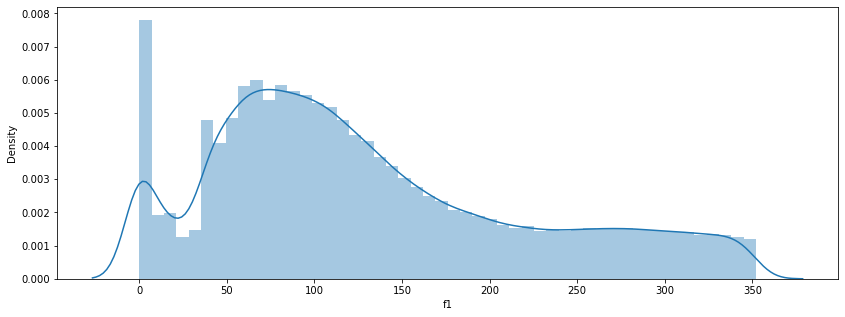

In [148]:
plt.figure(figsize = (14,5))
sns.distplot(df_sqroot['f1'])

In [149]:
f1_mean,f1_median, f1_diff = mean_median_diff(df,'f1')
f1_mean,f1_median, f1_diff

(25463.37, 12121.0, 13342.37)

In [150]:
f1_sqroot_mean,f1_sqroot_median, f1_sqroot_diff = mean_median_diff(df_sqroot,'f1')
f1_sqroot_mean,f1_sqroot_median, f1_sqroot_diff

(131.68, 110.1, 21.59)

#### The mean and median of original data were very far apart. After Square Root Transformation, the mean and median are almost equal, which is a characteristic of a normally distributed data. 

#### But we can still do better with other transformations

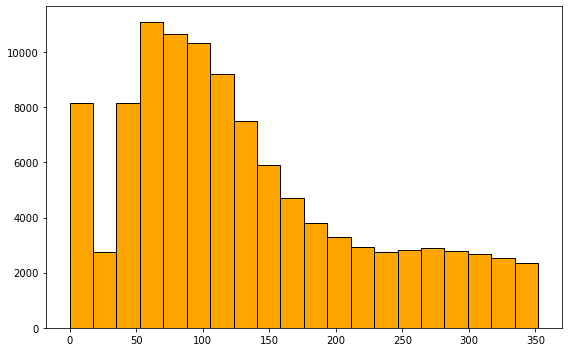

In [373]:
# Histogram

fig, axs = plt.subplots(1, 1,figsize =(8, 5),tight_layout = True)
axs.hist(df_sqroot['f1'], bins = 20, color = 'orange',edgecolor='black')
plt.show()

### Inversing the square root data back to original data

In [151]:
df_sqroot["f1_inversed"] = np.power(df_sqroot['f1'], 2)

In [152]:
df_sqroot.head()

,datetime,f1,f1_inversed
0,1990-03-01 00:00:00,66.000000,4356.0
1,1990-03-01 00:01:00,33.286634,1108.0
2,1990-03-01 00:02:00,61.261734,3753.0
3,1990-03-01 00:03:00,164.754363,27144.0
4,1990-03-01 00:04:00,37.523326,1408.0


## (3) Cube Root Transformation

In [101]:
df_cuberoot = df.copy()

In [102]:
# Cube root transformation works on positive, 0 as well as negative values

df_cuberoot['f1'] = np.cbrt(df_cuberoot['f1'])

In [103]:
df_cuberoot.head()

,datetime,f1
0,1990-03-01 00:00:00,16.331621
1,1990-03-01 00:01:00,10.347766
2,1990-03-01 00:02:00,15.540304
3,1990-03-01 00:03:00,30.053239
4,1990-03-01 00:04:00,11.208157


<AxesSubplot:xlabel='f1', ylabel='Density'>

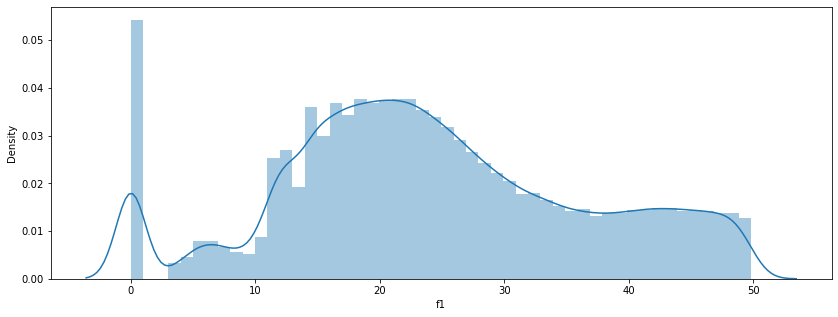

In [105]:
plt.figure(figsize = (14,5))
sns.distplot(df_cuberoot['f1'])

In [113]:
f1_mean,f1_median, f1_diff = mean_median_diff(df,'f1')
f1_mean,f1_median, f1_diff

(25463.37, 12121.0, 13342.37)

In [114]:
f1_cuberoot_mean,f1_cuberoot_median, f1_cuberoot_diff = mean_median_diff(df_cuberoot,'f1')
f1_cuberoot_mean,f1_cuberoot_median, f1_cuberoot_diff

(24.3, 22.97, 1.33)

#### The mean and median of original data were very far apart. After Cube Root Transformation, the mean and median are almost equal, which is a characteristic of a normally distributed data.

#### This transformed distribution looks pretty good.

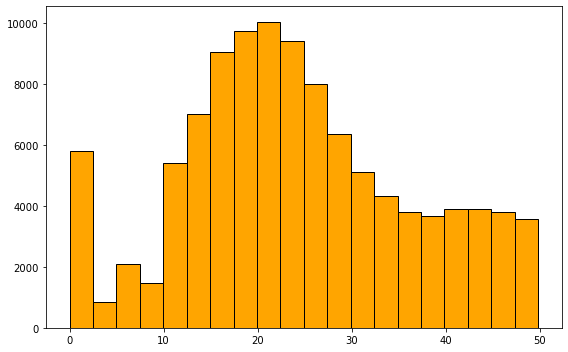

In [372]:
# Histogram

fig, axs = plt.subplots(1, 1,figsize =(8, 5),tight_layout = True)
axs.hist(df_cuberoot['f1'], bins = 20, color = 'orange', edgecolor='black')
plt.show()

### Inversing the cube root data back to original data

In [116]:
df_cuberoot["f1_inversed"] = np.power(df_cuberoot['f1'], 3)

In [130]:
df_cuberoot.head()

,datetime,f1,f1_inversed
0,1990-03-01 00:00:00,16.331621,4356.0
1,1990-03-01 00:01:00,10.347766,1108.0
2,1990-03-01 00:02:00,15.540304,3753.0
3,1990-03-01 00:03:00,30.053239,27144.0
4,1990-03-01 00:04:00,11.208157,1408.0


## (4) Inverse Transformation

In [169]:
df_inverse = df.copy()

In [170]:
# Inverse transformation does not work on 0 values. Our data has 5806 records with 0 values

len(df_inverse[df_inverse['f1'] == 0])

5806

In [171]:
# add 1 to each record in the data, since inverse transformation cannot work on 0 values

df_inverse['f1'] = df_inverse['f1'].apply(lambda x : x + 1)

In [172]:
# Inverse transformation

df_inverse['f1'] = df_inverse['f1'].apply(lambda x : 1/x)

In [173]:
df_inverse.head()

,datetime,f1
0,1990-03-01 00:00:00,0.000230
1,1990-03-01 00:01:00,0.000902
2,1990-03-01 00:02:00,0.000266
3,1990-03-01 00:03:00,0.000037
4,1990-03-01 00:04:00,0.000710


<AxesSubplot:xlabel='f1', ylabel='Density'>

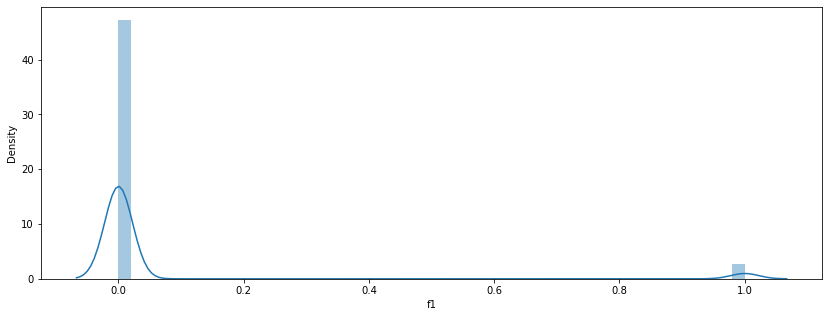

In [174]:
plt.figure(figsize = (14,5))
sns.distplot(df_inverse['f1'])

In [175]:
f1_mean,f1_median, f1_diff = mean_median_diff(df,'f1')
f1_mean,f1_median, f1_diff

(25463.37, 12121.0, 13342.37)

In [179]:
f1_inverse_mean,f1_inverse_median, f1_inverse_diff = mean_median_diff(df_inverse,'f1')
f1_inverse_mean,f1_inverse_median, f1_inverse_diff

(0.05, 0.0, 0.05)

####  After Inverse Transformation, the mean and median are closer than the original data, but now the data is converted into 2 classes i.e. values populated around 0 and values populated around 1. 

#### This transformation did not serve our purpose and hence, can be ignored.

In [178]:
df_inverse.describe()

,f1
count,107333.000000
mean,0.054433
std,0.226126
min,0.000008
25%,0.000029
50%,0.000082
75%,0.000233
max,1.000000


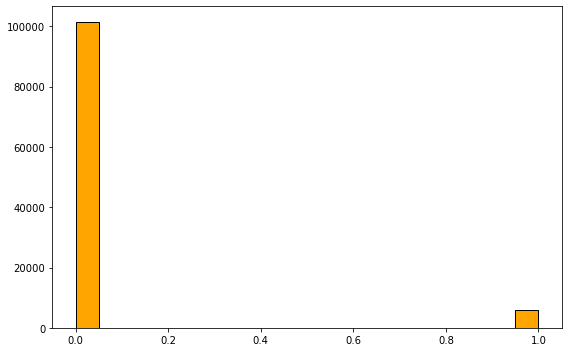

In [374]:
# Histogram
fig, axs = plt.subplots(1, 1,figsize =(8, 5),tight_layout = True)
axs.hist(df_inverse['f1'], bins = 20, color = 'orange',edgecolor='black')
plt.show()

### Inversing the inverse transformed data back to original data 

In [180]:
df_inverse["f1_inversed"] = df_inverse['f1'].apply(lambda x : 1/x)
df_inverse["f1_inversed"] = df_inverse['f1_inversed'].apply(lambda x : x - 1)

In [183]:
df_inverse.head()

,datetime,f1,f1_inversed
0,1990-03-01 00:00:00,0.000230,4356.0
1,1990-03-01 00:01:00,0.000902,1108.0
2,1990-03-01 00:02:00,0.000266,3753.0
3,1990-03-01 00:03:00,0.000037,27144.0
4,1990-03-01 00:04:00,0.000710,1408.0


##  (5) Box-Cox Transformation

In [201]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [250]:
df_boxcox = df.copy()

In [251]:
# data does not have any negative values, but have 5806 records that have 0 values

len(df_boxcox[df_boxcox['f1'] == 0]), len(df_boxcox[df_boxcox['f1'] < 0])

(5806, 0)

In [252]:
# Box-Cox transformation does not work on negative or 0 values, hence adding a constant (1) to all values

df_boxcox['f1'] = df_boxcox['f1'].apply(lambda x: x + 1)

In [253]:
# BoxCox transformation

df_boxcox_vals, fitted_lambda = boxcox(df_boxcox['f1'])

In [254]:
fitted_lambda

0.2657285286856578

In [255]:
df_boxcox['f1_boxcox'] = df_boxcox_vals

In [256]:
df_boxcox.head()

,datetime,f1,f1_boxcox
0,1990-03-01 00:00:00,4357.0,31.118471
1,1990-03-01 00:01:00,1109.0,20.485379
2,1990-03-01 00:02:00,3754.0,29.764705
3,1990-03-01 00:03:00,27145.0,52.954603
4,1990-03-01 00:04:00,1409.0,22.078236


<AxesSubplot:xlabel='f1_boxcox', ylabel='Density'>

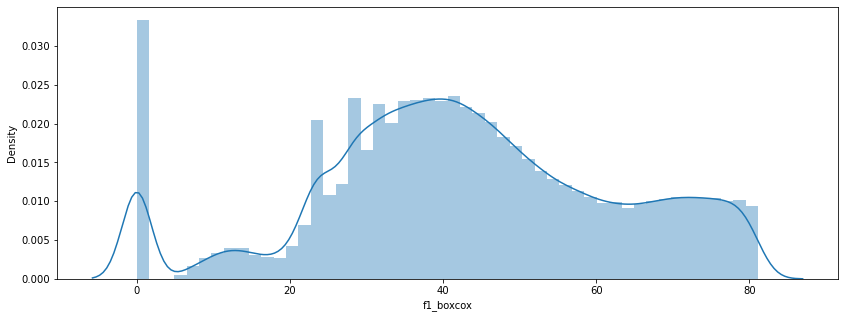

In [258]:
plt.figure(figsize = (14,5))
sns.distplot(df_boxcox['f1_boxcox'])

In [259]:
f1_mean,f1_median, f1_diff = mean_median_diff(df,'f1')
f1_mean,f1_median, f1_diff

(25463.37, 12121.0, 13342.37)

In [260]:
f1_boxcox_mean,f1_boxcox_median, f1_boxcox_diff = mean_median_diff(df_boxcox,'f1_boxcox')
f1_boxcox_mean,f1_boxcox_median, f1_boxcox_diff

(43.07, 42.02, 1.05)

#### The mean and median of original data were very far apart. After Box-Cox Transformation, the mean and median are almost equal, which is a characteristic of a normally distributed data.

#### This transformed distribution looks pretty good.

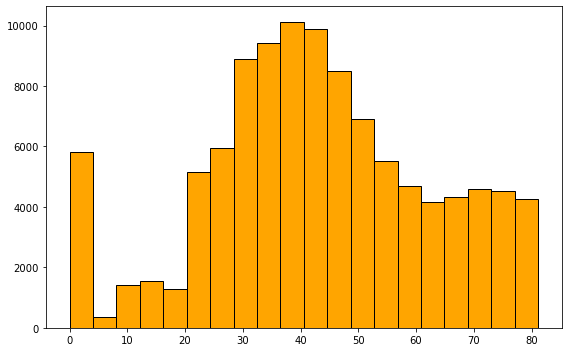

In [375]:
# Histogram

fig, axs = plt.subplots(1, 1,figsize =(8, 5),tight_layout = True)
axs.hist(df_boxcox['f1_boxcox'], bins = 20, color = 'orange',edgecolor='black')
plt.show()


### Inversing the Box-Cox transformed data back to original data

In [261]:
# Getting original values using Box-Cox Lambda parameter

inverse_vals = inv_boxcox(df_boxcox_vals, fitted_lambda)
inverse_vals

array([4357., 1109., 3754., ..., 5594., 3262., 1145.])

In [262]:
df_boxcox['f1_inversed'] = inverse_vals
df_boxcox['f1_inversed'] = df_boxcox['f1_inversed'].apply(lambda x : x - 1)

In [265]:
df_boxcox.head()

,datetime,f1,f1_boxcox,f1_inversed
0,1990-03-01 00:00:00,4357.0,31.118471,4356.0
1,1990-03-01 00:01:00,1109.0,20.485379,1108.0
2,1990-03-01 00:02:00,3754.0,29.764705,3753.0
3,1990-03-01 00:03:00,27145.0,52.954603,27144.0
4,1990-03-01 00:04:00,1409.0,22.078236,1408.0


## (6) Yeo-Johnson Transformation

     Yeo-Johnson Transformation is an extension of the Box-Cox Transformation, but works on negative and 0 values as well,  unlike the Box-Cox Transformation.

In [302]:
from scipy.stats import yeojohnson

In [303]:
df_yeoj = df.copy()

In [304]:
# data does not have any negative values, but have 5806 records that have 0 values

len(df_yeoj[df_yeoj['f1'] == 0]), len(df_yeoj[df_yeoj['f1'] < 0])

(5806, 0)

In [305]:
# Yeo Johnson transformation works on 0 values, by adding a constant (1) to all values automatically. So, we don't have to.
# Yeo Johnson transformation works on negative values as well.

# df_yeoj['f1'] = df_yeoj['f1'].apply(lambda x: x + 1)

In [306]:
# Yeo-Johnson transformation

df_yeoj_vals, fitted_lambda_yeoj = yeojohnson(df_yeoj['f1'])

In [307]:
fitted_lambda_yeoj

0.2657285062684284

In [308]:
df_yeoj['f1_yeoj'] = df_yeoj_vals

In [309]:
df_yeoj.head()

,datetime,f1,f1_yeoj
0,1990-03-01 00:00:00,4356.0,31.118467
1,1990-03-01 00:01:00,1108.0,20.485377
2,1990-03-01 00:02:00,3753.0,29.764701
3,1990-03-01 00:03:00,27144.0,52.954594
4,1990-03-01 00:04:00,1408.0,22.078234


<AxesSubplot:xlabel='f1_yeoj', ylabel='Density'>

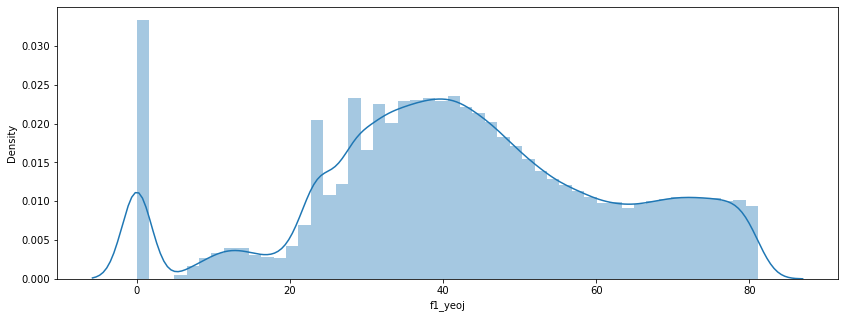

In [310]:
plt.figure(figsize = (14,5))
sns.distplot(df_yeoj['f1_yeoj'])

In [311]:
f1_mean,f1_median, f1_diff = mean_median_diff(df,'f1')
f1_mean,f1_median, f1_diff

(25463.37, 12121.0, 13342.37)

In [312]:
f1_yeoj_mean,f1_yeoj_median, f1_yeoj_diff = mean_median_diff(df_yeoj,'f1_yeoj')
f1_yeoj_mean,f1_yeoj_median, f1_yeoj_diff

(43.07, 42.02, 1.05)

#### The mean and median of original data were very far apart. After Yeo-Johnson Transformation, the mean and median are almost equal, which is a characteristic of a normally distributed data.

#### This transformed distribution looks pretty good.

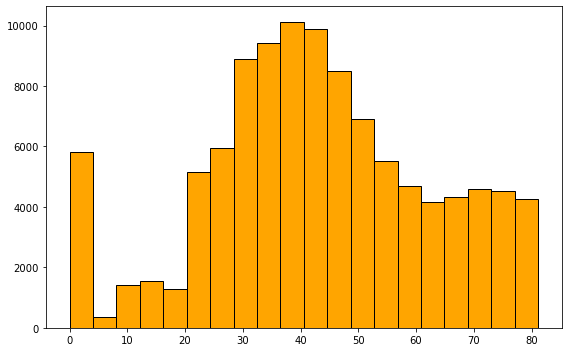

In [376]:
# Histogram

fig, axs = plt.subplots(1, 1,figsize =(8, 5),tight_layout = True)
axs.hist(df_yeoj['f1_yeoj'], bins = 20, color = 'orange',edgecolor='black')
plt.show()


### Inversing the Yeo-Johnson transformed data back to original data

In [313]:
# Getting original values using Yeo Johnson Lambda parameter

inverse_vals = inv_boxcox(df_yeoj_vals, fitted_lambda_yeoj)
inverse_vals

array([4357., 1109., 3754., ..., 5594., 3262., 1145.])

In [316]:
df_yeoj['f1_inversed'] = inverse_vals

In [317]:
df_yeoj.head()

,datetime,f1,f1_yeoj,f1_inversed
0,1990-03-01 00:00:00,4356.0,31.118467,4357.0
1,1990-03-01 00:01:00,1108.0,20.485377,1109.0
2,1990-03-01 00:02:00,3753.0,29.764701,3754.0
3,1990-03-01 00:03:00,27144.0,52.954594,27145.0
4,1990-03-01 00:04:00,1408.0,22.078234,1409.0


#### Yeo-Johnson Transformation adds a constant (1) to each value within it's algorithm, hence we need to subtract 1 from each value to get the original value

In [319]:
df_yeoj['f1_inversed'] = df_yeoj['f1_inversed'].apply(lambda x : x - 1)

In [320]:
df_yeoj.head()

,datetime,f1,f1_yeoj,f1_inversed
0,1990-03-01 00:00:00,4356.0,31.118467,4356.0
1,1990-03-01 00:01:00,1108.0,20.485377,1108.0
2,1990-03-01 00:02:00,3753.0,29.764701,3753.0
3,1990-03-01 00:03:00,27144.0,52.954594,27144.0
4,1990-03-01 00:04:00,1408.0,22.078234,1408.0


## Thank You! 

### Feel free to connect with me for further discussions on Statistical Analysis.

#### LinkedIn : https://www.linkedin.com/in/vineet-pandya/

#### Medium : https://medium.com/@vineet.pandya

#### Email : vineet.pandya@yahoo.com